In [1]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 

import matplotlib.pylab as pylab
# prikaz vecih slika 
pylab.rcParams['figure.figsize'] = 24,24

import cv2
import numpy as np

In [2]:
def add_template(templates_dict, point, search_duplicates_points = 7, print_info = False):
    '''Add the template if a template with the x and y around the certain point has NOT been added to the dictionary.'''
    for i in range(0,search_duplicates_points):
        if (templates_dict.has_key(point[0] + i)):
            for j in range(0,search_duplicates_points):
                if (templates_dict[point[0] + i] == point[1] + j):
                    if print_info:
                        print point[0], 'already here'
                    return False
                if (templates_dict[point[0] + i] == point[1] - j):
                    if print_info:
                        print point[0], 'already here'
                    return False
        if (templates_dict.has_key(point[0] - i)):
            for j in range(0,search_duplicates_points):
                if (templates_dict[point[0] - i] == point[1] + j):
                    if print_info:
                        print point[0], 'already here'
                    return False
                if (templates_dict[point[0] - i] == point[1] - j):
                    if print_info:
                        print point[0], 'already here'
                    return False
    
    templates_dict[point[0]] = point[1] # add the template
    if print_info:
        print point[0], 'added successfully with y = ', point[1]
    return True

# Images, constants and dictionaries definition

In [3]:
img_stems = cv2.imread('../slike/nove/Composicion_dodecafonica.jpg',0)
img_heads = cv2.imread('../slike/nove/Composicion_dodecafonica.jpg',0)
img_heads_plot = cv2.imread('../slike/nove/Composicion_dodecafonica.jpg')

total_full_heads = 32
total_HALF_heads = 12

single_templates_dict = {
    'full_heads':{}, 'half_heads': {}, 'whole_heads': {},
    'eight_stems_up': {},'eight_stems_down': {},
    'sixteen_stems_up': {}, 'sixteen_stems_down': {},
    'eight_hooks_up_start': {}, 'eight_hooks_up_end': {},
    'eight_hooks_down_start': {}, 'eight_hooks_down_end': {},
    'quarter_breaks': {}, 'half_breaks': {}, 'whole_breaks': {},
    'dot': {}
    }
threshold = 0.8

In [4]:
def note_has_dot(note_x, note_y, note_type):
    '''Returns true if note has it's duration lenghtened by a dot.'''
    if (all_dots_dict[note_type].has_key(note_x)):
        if (all_dots_dict[note_type][note_x] == note_y):
            return True
    return False

In [5]:
# dictionary contains all note heads with assigned stems
all_notes_dict = {'wholes': {}, 'halves_up': {}, 'halves_down': {}, 'quarters_up': {}, 'quarters_down': {},
                  'eights_up': {}, 'eights_down': {}, 'sixteens_up': {}, 'sixteens_down': {}}

# dictionary contains all notes which have assigned dots
all_dots_dict = {'wholes': {}, 'halves_up': {}, 'halves_down': {}, 'quarters_up': {}, 'quarters_down': {},
                  'eights_up': {}, 'eights_down': {}, 'sixteens_up': {}, 'sixteens_down': {}}

# dictionaries contain all notes which have assigned accidentals (flats and sharps)
all_flats_dict = {'wholes': {}, 'halves_up': {}, 'halves_down': {}, 'quarters_up': {}, 'quarters_down': {},
                  'eights_up': {}, 'eights_down': {}, 'sixteens_up': {}, 'sixteens_down': {}}

all_sharps_dict = {'wholes': {}, 'halves_up': {}, 'halves_down': {}, 'quarters_up': {}, 'quarters_down': {},
                  'eights_up': {}, 'eights_down': {}, 'sixteens_up': {}, 'sixteens_down': {}}

all_hooks_dict = {'start': {}, 'end': {}}

all_breaks_dict = {'wholes': {}, 'halves': {}, 'quarters': {}, 'eights': {}, 'sixteens': {}}

In [6]:
full_head_with_lines_down_template = cv2.imread('../slike/nove/templejti/glava-puna-sa-linijama-gore.jpg',0)
full_head_template_w, full_head_template_h = full_head_with_lines_down_template.shape[::-1]

eight_stem_down_template = cv2.imread('../slike/nove/templejti/osmina-dole.jpg',0)
eight_stem_down_template_w, eight_stem_down_template_h = eight_stem_down_template.shape[::-1]

eight_stem_up_template = cv2.imread('../slike/nove/templejti/osmina-gore.jpg',0)
eight_stem_up_template_w, eight_stem_up_template_h = eight_stem_up_template.shape[::-1]

sixteen_stem_template_w = 30
sixteen_stem_template_h = 80

quarter_break_template_w = 20
quarter_break_template_h = 60

# Full note heads

In [7]:
full_head_with_lines_down_template = cv2.imread('../slike/nove/templejti/glava-puna-dole.jpg',0)
w, h = full_head_with_lines_down_template.shape[::-1]

res = cv2.matchTemplate(img_heads, full_head_with_lines_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [8]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['full_heads'], point)
    cv2.rectangle(img_heads, point, (point[0] + w, point[1] + h - 6), (255,255,255), 18)
    cv2.rectangle(img_heads_plot, point, (point[0] + w, point[1] + h), (0,255,255), 5)

In [9]:
full_head_with_lines_up_template = cv2.imread('../slike/nove/templejti/glava-puna-gore.jpg',0)
w, h = full_head_with_lines_up_template.shape[::-1]

res = cv2.matchTemplate(img_heads, full_head_with_lines_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [10]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['full_heads'], point)
    cv2.rectangle(img_heads, point, (point[0] + w, point[1] + h - 6), (255,255,255), 18)
    cv2.rectangle(img_heads_plot, point, (point[0] + w*2, point[1] + 3), (255,0,0), 5)

In [11]:
full_head_up_template = cv2.imread('../slike/nove/templejti/glava-puna-sa-linijama-gore.jpg',0)
w, h = full_head_up_template.shape[::-1]

res = cv2.matchTemplate(img_heads, full_head_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [12]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['full_heads'], point)
    cv2.rectangle(img_heads, point, (point[0] + w, point[1] + h - 6), (255,255,255), 18)
    cv2.circle(img_heads_plot, point, 15, (0,255,0), 5)

In [13]:
full_head_down_template = cv2.imread('../slike/nove/templejti/glava-puna-sa-linijama-dole.jpg',0)
w, h = full_head_down_template.shape[::-1]

res = cv2.matchTemplate(img_heads, full_head_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [14]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['full_heads'], point)
    cv2.rectangle(img_heads, point, (point[0] + w, point[1] + h - 6), (255,255,255), 18)
    cv2.circle(img_heads_plot, point, 25, (255,0,255), 5)

In [15]:
print 'found:', len(single_templates_dict['full_heads'])
print 'total notes, for real:', total_full_heads

found: 32
total notes, for real: 32


# Half note heads

In [16]:
threshold = 0.77
img_halves_no_full_heads = img_heads.copy()
img_halves_no_full_heads_plot = img_heads_plot.copy()
single_templates_dict['half_heads'] = {}

In [17]:
half_head_down_template = cv2.imread('../slike/nove/templejti/polovina-gore.jpg',0)
w, h = half_head_down_template.shape[::-1]

res = cv2.matchTemplate(img_halves_no_full_heads, half_head_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [18]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['half_heads'], point)
    cv2.rectangle(img_halves_no_full_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_halves_no_full_heads_plot, point, (point[0] + w * 2, point[1] + h * 2), (0,255,255), 5)

In [19]:
half_head_up_template = cv2.imread('../slike/nove/templejti/polovina-sa-linijama-gore.jpg',0)
w, h = half_head_up_template.shape[::-1]

res = cv2.matchTemplate(img_halves_no_full_heads, half_head_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= 0.78)

In [20]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['half_heads'], point)
    cv2.rectangle(img_halves_no_full_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_halves_no_full_heads_plot, point, (point[0] + w * 2, point[1] + h * 2), (0,255,255), 5)

In [21]:
half_head_up_2_template = cv2.imread('../slike/nove/templejti/polovina-gore-2.jpg',0)
_ , half_head_up_2_template = cv2.threshold(half_head_up_2_template, 100, 255, cv2.THRESH_BINARY)
w, h = half_head_up_2_template.shape[::-1]

res = cv2.matchTemplate(img_halves_no_full_heads, half_head_up_2_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [22]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['half_heads'], point)
    cv2.rectangle(img_halves_no_full_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_halves_no_full_heads_plot, point, (point[0] + w * 2, point[1] + h * 2), (0,255,255), 5)

In [23]:
half_head_up_2_template = cv2.imread('../slike/nove/templejti/polovina-na-liniji.jpg',0)
_ , half_head_up_2_template = cv2.threshold(half_head_up_2_template, 100, 255, cv2.THRESH_BINARY)
w, h = half_head_up_2_template.shape[::-1]

res = cv2.matchTemplate(img_halves_no_full_heads, half_head_up_2_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [24]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['half_heads'], point)
    cv2.rectangle(img_halves_no_full_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_halves_no_full_heads_plot, point, (point[0] + w * 2, point[1] + h * 2), (0,255,255), 5)

In [25]:
half_head_up_2_template = cv2.imread('../slike/nove/templejti/polovina-sa-linijama-dole.jpg',0)
_ , half_head_up_2_template = cv2.threshold(half_head_up_2_template, 100, 255, cv2.THRESH_BINARY)
w, h = half_head_up_2_template.shape[::-1]

res = cv2.matchTemplate(img_halves_no_full_heads, half_head_up_2_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [26]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['half_heads'], point)
    cv2.rectangle(img_halves_no_full_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_halves_no_full_heads_plot, point, (point[0] + w * 2, point[1] + h * 2), (0,255,255), 5)

In [27]:
print single_templates_dict['half_heads']
print len(single_templates_dict['half_heads'])

{640: 850, 1636: 816, 1194: 529, 747: 822, 1900: 541, 1390: 558, 688: 531, 1746: 845, 1110: 561, 1815: 523, 1305: 529, 606: 549}
12


In [28]:
all_notes_dict['halves_up'] = single_templates_dict['half_heads']

# Whole note heads

In [29]:
threshold = 0.75
img_wholes_no_other_heads = img_halves_no_full_heads.copy()
img_wholes_no_other_heads_plot = img_halves_no_full_heads_plot.copy()
single_templates_dict['whole_heads'] = {}

In [30]:
whole_head_down_template = cv2.imread('../slike/nove/templejti/cijela-1.jpg',0)
w, h = whole_head_down_template.shape[::-1]

res = cv2.matchTemplate(img_wholes_no_other_heads, whole_head_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [31]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['whole_heads'], point)
    cv2.rectangle(img_wholes_no_other_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_wholes_no_other_heads_plot, point, (point[0] + w * 2, point[1] + h * 2), (0,255,255), 5)

In [32]:
whole_head_down_template = cv2.imread('../slike/nove/templejti/cijela-2.jpg',0)
w, h = whole_head_down_template.shape[::-1]

res = cv2.matchTemplate(img_wholes_no_other_heads, whole_head_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [33]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['whole_heads'], point)
    cv2.rectangle(img_wholes_no_other_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_wholes_no_other_heads_plot, point, (point[0] + w * 2, point[1] + h * 2), (0,255,255), 5)

In [34]:
print len(single_templates_dict['whole_heads'])

1


# Eight note stems (up and down)

In [35]:
threshold = 0.8
img_no_heads = img_wholes_no_other_heads.copy()
img_no_heads_plot = img_wholes_no_other_heads_plot.copy()
single_templates_dict['eight_stems_up'] = {}
single_templates_dict['eight_stems_down'] = {}

In [36]:
eight_down_template = cv2.imread('../slike/nove/templejti/osmina-dole.jpg',0)
w, h = eight_down_template.shape[::-1]

res = cv2.matchTemplate(img_stems, eight_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [37]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_stems_down'], point)
    cv2.rectangle(img_no_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_plot, point, (point[0] + w * 2, point[1] + h / 3), (0,255,255), 5)

In [38]:
eight_down_template = cv2.imread('../slike/nove/templejti/osmina-dole-2.jpg',0)
w, h = eight_down_template.shape[::-1]

res = cv2.matchTemplate(img_stems, eight_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [39]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_stems_down'], point)
    cv2.rectangle(img_no_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_plot, point, (point[0] + w * 2, point[1] + h / 3), (0,255,255), 5)

In [40]:
eight_up_template = cv2.imread('../slike/nove/templejti/osmina-gore.jpg',0)
w, h = eight_up_template.shape[::-1]

res = cv2.matchTemplate(img_stems, eight_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [41]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_stems_up'], point)
    cv2.rectangle(img_no_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_plot, point, (point[0] + w * 2, point[1] + h / 3), (0,255,255), 5)

In [42]:
threshold = 0.7
eight_up_template = cv2.imread('../slike/nove/templejti/osmina-gore-2.jpg',0)
w, h = eight_up_template.shape[::-1]

res = cv2.matchTemplate(img_stems, eight_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)
threshold = 0.8

In [43]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_stems_up'], point)
    cv2.rectangle(img_no_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_plot, point, (point[0] + w * 2, point[1] + h / 3), (255,0,0), 5)

In [44]:
print len(single_templates_dict['eight_stems_up'])
print len(single_templates_dict['eight_stems_down'])
asd = single_templates_dict['eight_stems_up'].items()
asd.sort()
for k,v in asd:
    print k,v

0
0


# Sixteen note stems (up and down)

In [45]:
threshold = 0.8
single_templates_dict['sixteen_stems_up'] = {}
single_templates_dict['sixteen_stems_down'] = {}

In [46]:
sixteen_up_template = cv2.imread('../slike/nove/templejti/sesnaestina-gore.jpg',0)
w, h = sixteen_up_template.shape[::-1]

res = cv2.matchTemplate(img_stems, sixteen_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [47]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['sixteen_stems_up'], point)
    cv2.rectangle(img_no_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_plot, point, (point[0] + w * 2, point[1] + h / 3), (255,0,0), 5)

In [48]:
sixteen_down_template = cv2.imread('../slike/nove/templejti/sesnaestina-dole.jpg',0)
w, h = sixteen_down_template.shape[::-1]

res = cv2.matchTemplate(img_stems, sixteen_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [49]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['sixteen_stems_down'], point)
    cv2.rectangle(img_no_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_plot, point, (point[0] + w * 2, point[1] + h / 3), (255,0,0), 5)

In [50]:
print len(single_templates_dict['sixteen_stems_up'])
print len(single_templates_dict['sixteen_stems_down'])

0
0


# Remembering all full heads found

In [51]:
ALL_FULL_HEADS_FOUND = len(single_templates_dict['full_heads'])

# Heads + stems UP

In [52]:
def search_around_template_point_up(point, templates_dict, search_points = 18, print_info = True):
    '''Searchs for a specific template around certain point of a specific template. 
    
    Example: Searches for eight stems around full note head
    :param point: point around which we search for a template from the templates_dict
    :param templates_dict: dictionary of templates to be searched through
    '''
    
    for i in range(0, search_points):
        if (templates_dict.has_key(point[0] + full_head_template_w + i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] + full_head_template_w + i] == point[1] - eight_stem_up_template_h + j):
                    if print_info:
                        cv2.rectangle(img_no_heads_plot,
                                      (point[0] + full_head_template_w, point[1] - eight_stem_up_template_h),
                                      (point[0] + full_head_template_w + 200, point[1] - eight_stem_up_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_heads_plot, (point[0] + full_head_template_w + i, point[1] - eight_stem_up_template_h + j), 10, (255,0,0), 10)
                    return True
                if (templates_dict[point[0] + full_head_template_w + i] == point[1] - eight_stem_up_template_h - j):
                    if print_info:
                        cv2.rectangle(img_no_heads_plot,
                                      (point[0] + full_head_template_w, point[1] - eight_stem_up_template_h),
                                      (point[0] + full_head_template_w + 200, point[1] - eight_stem_up_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_heads_plot, (point[0] + full_head_template_w + i, point[1] - eight_stem_up_template_h - j), 10, (255,0,0), 10)
                    return True
        if (templates_dict.has_key(point[0] + full_head_template_w - i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] + full_head_template_w - i] == point[1] - eight_stem_up_template_h + j):
                    if print_info:
                        cv2.rectangle(img_no_heads_plot,
                                      (point[0] + full_head_template_w, point[1] - eight_stem_up_template_h),
                                      (point[0] + full_head_template_w + 200, point[1] - eight_stem_up_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_heads_plot, (point[0] + full_head_template_w - i, point[1] - eight_stem_up_template_h + j), 10, (255,0,0), 10)
                    return True
                if (templates_dict[point[0] + full_head_template_w - i] == point[1] - eight_stem_up_template_h - j):
                    if print_info:
                        cv2.rectangle(img_no_heads_plot,
                                      (point[0] + full_head_template_w, point[1] - eight_stem_up_template_h),
                                      (point[0] + full_head_template_w + 200, point[1] - eight_stem_up_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_heads_plot, (point[0] + full_head_template_w - i, point[1] - eight_stem_up_template_h - j), 10, (255,0,0), 10)
                    return True
    
    return False

In [53]:
for head_x, head_y in single_templates_dict['full_heads'].items(): # for each note head found
    if (search_around_template_point_up((head_x, head_y), single_templates_dict['eight_stems_up'])):
        all_notes_dict['eights_up'][head_x] = head_y
        del single_templates_dict['full_heads'][head_x]
    if (search_around_template_point_up((head_x, head_y), single_templates_dict['sixteen_stems_up'])):
        all_notes_dict['sixteens_up'][head_x] = head_y
        del single_templates_dict['full_heads'][head_x]

In [54]:
print len(all_notes_dict['eights_up'])
print len(all_notes_dict['sixteens_up'])

0
0


# Heads + stems DOWN

In [55]:
def search_around_template_point_down(point, templates_dict, search_points = 18, print_info = True):
    '''Searchs for a specific template around certain point of a specific template. 
    
    Example: Searches for eight stems around full note head
    :param point: point around which we search for a template from the templates_dict
    :param templates_dict: dictionary of templates to be searched through
    '''
    
    for i in range(0, search_points):
        if (templates_dict.has_key(point[0] + i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] + i] == point[1] + full_head_template_h + j):
                    if print_info:
                        cv2.rectangle(img_no_heads_plot,
                                      (point[0], point[1] + full_head_template_h),
                                      (point[0] + 200, point[1] + full_head_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_heads_plot, (point[0] + i, point[1] + full_head_template_h + j), 10, (255,0,0), 10)
                    return True
                if (templates_dict[point[0] + i] == point[1] + full_head_template_h - j):
                    if print_info:
                        cv2.rectangle(img_no_heads_plot,
                                      (point[0], point[1] + full_head_template_h),
                                      (point[0] + 200, point[1] + full_head_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_heads_plot, (point[0] + i, point[1] + full_head_template_h - j), 10, (255,0,0), 10)
                    return True
        if (templates_dict.has_key(point[0] - i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] - i] == point[1] + full_head_template_h + j):
                    if print_info:
                        cv2.rectangle(img_no_heads_plot,
                                      (point[0], point[1] + full_head_template_h),
                                      (point[0] + 200, point[1] + full_head_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_heads_plot, (point[0] - i, point[1] + full_head_template_h + j), 10, (255,0,0), 10)
                    return True
                if (templates_dict[point[0] - i] == point[1] + full_head_template_h - j):
                    if print_info:
                        cv2.rectangle(img_no_heads_plot,
                                      (point[0], point[1] + full_head_template_h),
                                      (point[0] + 200, point[1] + full_head_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_heads_plot, (point[0] - i, point[1] + full_head_template_h - j), 10, (255,0,0), 10)
                    return True
    
    return False

In [56]:
for head_x, head_y in single_templates_dict['full_heads'].items(): # for each note head found
    if (search_around_template_point_down((head_x, head_y), single_templates_dict['eight_stems_down'])):
        all_notes_dict['eights_down'][head_x] = head_y
        del single_templates_dict['full_heads'][head_x]
    if (search_around_template_point_down((head_x, head_y), single_templates_dict['sixteen_stems_down'])):
        all_notes_dict['sixteens_down'][head_x] = head_y
        del single_templates_dict['full_heads'][head_x]

In [57]:
print len(all_notes_dict['eights_down'])
print len(all_notes_dict['sixteens_down'])

0
0


# Hooks - START

In [58]:
img_no_heads_no_stems = img_no_heads.copy()
img_no_heads_no_stems_plot = img_no_heads_plot.copy()

In [59]:
threshold = 0.8
single_templates_dict['eight_hooks_up_start'] = {}
single_templates_dict['eight_hooks_down_start'] = {}

## Hooks - start up

In [60]:
hook_start_eight_down_template = cv2.imread('../slike/nove/templejti/kuka-gore-pocetak-1.jpg',0)
w, h = hook_start_eight_down_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [61]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_up_start'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (100,155,155), 5)

In [62]:
hook_start_eight_up_template = cv2.imread('../slike/nove/templejti/kuka-gore-pocetak-2.jpg',0)
hook_start_eight_up_template_w, hook_start_eight_up_template_h = hook_start_eight_up_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [63]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_up_start'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + hook_start_eight_up_template_w, point[1] + hook_start_eight_up_template_h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + hook_start_eight_up_template_w * 2, point[1] + hook_start_eight_up_template_h), (100,155,155), 5)

In [64]:
hook_start_eight_up_template = cv2.imread('../slike/nove/templejti/kuka-gore-pocetak-3.jpg',0)
hook_start_eight_up_template_w, hook_start_eight_up_template_h = hook_start_eight_up_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [65]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_up_start'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + hook_start_eight_up_template_w, point[1] + hook_start_eight_up_template_h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + hook_start_eight_up_template_w * 2, point[1] + hook_start_eight_up_template_h), (100,155,155), 5)

## Hooks - start down

In [66]:
hook_start_eight_up_template = cv2.imread('../slike/nove/templejti/kuka-dole-pocetak-1.jpg',0)
w, h = hook_start_eight_up_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [67]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_down_start'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (100,155,155), 5)

In [68]:
hook_start_eight_up_template = cv2.imread('../slike/nove/templejti/kuka-dole-pocetak-2.jpg',0)
w, h = hook_start_eight_up_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [69]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_down_start'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (100,155,155), 5)

In [70]:
hook_start_eight_up_template = cv2.imread('../slike/nove/templejti/kuka-dole-pocetak-3.jpg',0)
w, h = hook_start_eight_up_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [71]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_down_start'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (100,155,155), 5)

In [72]:
print 'eight hooks which start up:  ', len(single_templates_dict['eight_hooks_up_start'])
print 'eight hooks which start down:', len(single_templates_dict['eight_hooks_down_start'])

eight hooks which start up:   5
eight hooks which start down: 0


# Hooks - END

In [73]:
threshold = 0.75
single_templates_dict['eight_hooks_up_end'] = {}
single_templates_dict['eight_hooks_down_end'] = {}

In [74]:
hook_start_eight_down_template = cv2.imread('../slike/nove/templejti/kuka-gore-kraj-1.jpg',0)
w, h = hook_start_eight_down_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [75]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_up_end'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (255,0,0), 5)

In [76]:
hook_start_eight_down_template = cv2.imread('../slike/nove/templejti/kuka-gore-kraj-2.jpg',0)
w, h = hook_start_eight_down_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [77]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_up_end'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (0,255,0), 5)

In [78]:
hook_start_eight_down_template = cv2.imread('../slike/nove/templejti/kuka-gore-kraj-3.jpg',0)
w, h = hook_start_eight_down_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [79]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_up_end'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (0,0,255), 5)

In [80]:
hook_start_eight_down_template = cv2.imread('../slike/nove/templejti/kuka-dole-kraj-1.jpg',0)
w, h = hook_start_eight_down_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [81]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_down_end'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (200,55,55), 5)

In [82]:
hook_start_eight_down_template = cv2.imread('../slike/nove/templejti/kuka-dole-kraj-2.jpg',0)
w, h = hook_start_eight_down_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [83]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_down_end'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (200,55,55), 5)

In [84]:
hook_start_eight_down_template = cv2.imread('../slike/nove/templejti/kuka-dole-kraj-3.jpg',0)
w, h = hook_start_eight_down_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [85]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_down_end'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (200,55,55), 5)

In [86]:
print 'eight hooks which end up:  ', len(single_templates_dict['eight_hooks_up_end'])
print 'eight hooks which end down:', len(single_templates_dict['eight_hooks_down_end'])

eight hooks which end up:   6
eight hooks which end down: 0


# Heads + hooks . Start UP

In [87]:
def head_with_hook_up(head_point, hooks_start_or_end_dict, search_points = 20, print_info = True):
    '''Find a full head to match an eight hook directed upwards. 

    :param head_point: point around which we search for a full head
    '''
    hook_start_eight_up_template_h = 60
    
    for i in range(0, search_points):
        if (single_templates_dict[hooks_start_or_end_dict].has_key(head_point[0] + i)):
            for j in range(0, search_points):
                if (single_templates_dict[hooks_start_or_end_dict][head_point[0] + i] == head_point[1] - hook_start_eight_up_template_h + j):
                    if print_info:
                        cv2.rectangle(img_no_heads_no_stems_plot,
                                      (head_point[0], head_point[1] - hook_start_eight_up_template_h),
                                      (head_point[0] - 100, head_point[1] - hook_start_eight_up_template_h + 3),
                                     (100,200,50), 5)
                        cv2.circle(img_no_heads_no_stems_plot, (head_point[0] + i, head_point[1] - hook_start_eight_up_template_h + j), 10, (255,0,0), 10)
                    return True
                
                if (single_templates_dict[hooks_start_or_end_dict][head_point[0] + i] == head_point[1] - hook_start_eight_up_template_h - j):
                    if print_info:
                        cv2.rectangle(img_no_heads_no_stems_plot,
                                      (head_point[0], head_point[1] - hook_start_eight_up_template_h),
                                      (head_point[0] - 100, head_point[1] - hook_start_eight_up_template_h + 3),
                                     (100,200,50), 5)
                        cv2.circle(img_no_heads_no_stems_plot, (head_point[0] + i, head_point[1] - hook_start_eight_up_template_h - j), 10, (255,0,0), 10)
                    return True
    
    return False

In [88]:
for head_x, head_y in single_templates_dict['full_heads'].items():
    if head_with_hook_up((head_x, head_y), 'eight_hooks_up_start'):
        all_notes_dict['eights_up'][head_x] = head_y
        all_hooks_dict['start'][head_x] = head_y
        del single_templates_dict['full_heads'][head_x]
        print head_x, head_y

1986 923
965 861
1569 517
343 934


# Heads + hooks . Start DOWN

In [89]:
def head_with_hook_down(head_point, hooks_start_or_end_dict, search_points = 18, print_info = True):
    '''Find a full head to match an eight hook directed upwards. 

    :param head_point: point around which we search for a full head
    '''
    
    for i in range(0, search_points):
        if (single_templates_dict[hooks_start_or_end_dict].has_key(head_point[0] - i)):
            for j in range(0, search_points):
                if (single_templates_dict[hooks_start_or_end_dict][head_point[0] - i] == head_point[1] + full_head_template_h + j):
                    if print_info:
                        cv2.rectangle(img_no_heads_no_stems_plot,
                                      (head_point[0], head_point[1] + full_head_template_h),
                                      (head_point[0] - 100, head_point[1] + full_head_template_h + 3),
                                     (100,200,50), 5)
                        cv2.circle(img_no_heads_no_stems_plot, (head_point[0] + i, head_point[1] + full_head_template_h + j), 10, (255,0,0), 10)
                    return True
                
                if (single_templates_dict[hooks_start_or_end_dict][head_point[0] - i] == head_point[1] + full_head_template_h - j):
                    if print_info:
                        cv2.rectangle(img_no_heads_no_stems_plot,
                                      (head_point[0], head_point[1] + full_head_template_h),
                                      (head_point[0] - 100, head_point[1] + full_head_template_h + 3),
                                     (100,200,50), 5)
                        cv2.circle(img_no_heads_no_stems_plot, (head_point[0] + i, head_point[1] + full_head_template_h - j), 10, (255,0,0), 10)
                    return True
    
    return False

In [90]:
for head_x, head_y in single_templates_dict['full_heads'].items():
    if head_with_hook_down((head_x, head_y), 'eight_hooks_down_start'):
        all_notes_dict['eights_down'][head_x] = head_y
        all_hooks_dict['start'][head_x] = head_y
        del single_templates_dict['full_heads'][head_x]
        print head_x, head_y

# Heads + hooks . End UP

In [91]:
ends_matched = 0
for head_x, head_y in single_templates_dict['full_heads'].items():
    if head_with_hook_up((head_x, head_y), 'eight_hooks_up_end'):
        all_notes_dict['eights_up'][head_x] = head_y
        all_hooks_dict['end'][head_x] = head_y
        del single_templates_dict['full_heads'][head_x]
        ends_matched += 1
print ends_matched

4


# Heads + hooks . End DOWN

In [92]:
ends_matched = 0
for head_x, head_y in single_templates_dict['full_heads'].items():
    if head_with_hook_down((head_x, head_y), 'eight_hooks_down_end'):
        all_notes_dict['eights_down'][head_x] = head_y
        all_hooks_dict['end'][head_x] = head_y
        del single_templates_dict['full_heads'][head_x]
        ends_matched += 1
print ends_matched

0


# Declare the rest of the full note heads as quarters

In [93]:
all_notes_dict['quarters_up'] = single_templates_dict['full_heads'].copy()
single_templates_dict['full_heads'].clear()

In [94]:
print len(all_notes_dict['quarters_up'])
print single_templates_dict['full_heads']

24
{}


In [95]:
for x, y in all_notes_dict['quarters_up'].items():
    cv2.rectangle(img_no_heads_no_stems_plot, (x,y), (x + 3, y - 100), (55,255,50), 5)

# Dots

In [96]:
img_dots = img_no_heads_no_stems.copy()
img_dots_plot = img_no_heads_no_stems_plot.copy()
threshold = 0.85
#single_templates_dict['dot'] = {}

In [97]:
dot_template_1 = cv2.imread('../slike/nove/templejti/tacka-1.jpg',0)
w, h = dot_template_1.shape[::-1]

res = cv2.matchTemplate(img_dots, dot_template_1, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [98]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['dot'], point)
    cv2.rectangle(img_dots, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.circle(img_dots_plot, point, 30, (100,155,155), 15)

In [99]:
dot_template_2 = cv2.imread('../slike/bez-linija/tacka-2.jpg',0)
#asd, dot_template_2 = cv2.threshold(dot_template, 100, 255, cv2.THRESH_BINARY)
w, h = dot_template_2.shape[::-1]

res = cv2.matchTemplate(img_dots, dot_template_2, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [100]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['dot'], point)
    cv2.rectangle(img_dots, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.circle(img_dots_plot, point, 30, (100,155,155), 15)

In [101]:
print len(single_templates_dict['dot'])

0


# Notes + dots

In [102]:
def find_note_for_dot(point, templates_dict, template_width, search_points = 18, print_info = True):
    '''Searchs for a specific head template around certain dot. 
    
    Example: Searches for a full head note before a dot on point :param point:
    :param point: point around which we search for a note head from the templates_dict
    :param templates_dict: dictionary of templates to be searched through
    '''
    
    dot_head_min_distance = 5  # the dot has at least this much pixels to the left before it reaches a note head
    
    for i in range(0, search_points):
        if (templates_dict.has_key(point[0] - template_width - dot_head_min_distance + i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] - template_width - dot_head_min_distance + i] == point[1] + j):
                    if print_info:
                        cv2.rectangle(img_dots_plot,
                                      (point[0], point[1]),
                                      (point[0] + 200, point[1] + 3),
                                     (0,255,0), 5)
                        cv2.circle(img_dots_plot, (point[0] + i, point[1] + j), 10, (0,255,0), 10)
                    return True
                if (templates_dict[point[0] - template_width - dot_head_min_distance + i] == point[1] - j):
                    if print_info:
                        cv2.rectangle(img_dots_plot,
                                      (point[0], point[1]),
                                      (point[0] + 200, point[1] + 3),
                                     (0,255,0), 5)
                        cv2.circle(img_dots_plot, (point[0] + i, point[1] - j), 10, (0,255,0), 10)
                    return True
        if (templates_dict.has_key(point[0] - template_width - dot_head_min_distance - i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] - template_width - dot_head_min_distance - i] == point[1] + j):
                    if print_info:
                        cv2.rectangle(img_dots_plot,
                                      (point[0], point[1]),
                                      (point[0] + 200, point[1] + 3),
                                     (0,255,0), 5)
                        cv2.circle(img_dots_plot, (point[0] - i, point[1] + j), 10, (0,255,0), 10)
                    return True
                if (templates_dict[point[0] - template_width - dot_head_min_distance - i] == point[1] - j):
                    if print_info:
                        cv2.rectangle(img_dots_plot,
                                      (point[0], point[1]),
                                      (point[0] + 200, point[1] + 3),
                                     (0,255,0), 5)
                        cv2.circle(img_dots_plot, (point[0] - i, point[1] - j), 10, (0,255,0), 10)
                    return True
    
    return False

In [103]:
for dot_x, dot_y in single_templates_dict['dot'].items():
    for key in all_notes_dict.keys():
        if (find_note_for_dot((dot_x, dot_y), all_notes_dict[key], full_head_template_w) ):
            all_dots_dict[key][dot_x] = dot_y

In [104]:
for key in all_dots_dict.keys():
    print key, 'with dots:', len(all_dots_dict[key])

eights_up with dots: 0
eights_down with dots: 0
halves_up with dots: 0
halves_down with dots: 0
quarters_up with dots: 0
sixteens_down with dots: 0
sixteens_up with dots: 0
wholes with dots: 0
quarters_down with dots: 0


In [105]:
print len(all_hooks_dict['end']), 'out of',16

4 out of 16


In [106]:
print len(all_hooks_dict['start']), 'out of',16

4 out of 16


In [107]:
print len(all_notes_dict['eights_up']), 'out of',37

8 out of 37


In [108]:
print len(all_notes_dict['eights_down']), 'out of',4

0 out of 4


In [109]:
print ALL_FULL_HEADS_FOUND
print len(single_templates_dict['full_heads'])

32
0


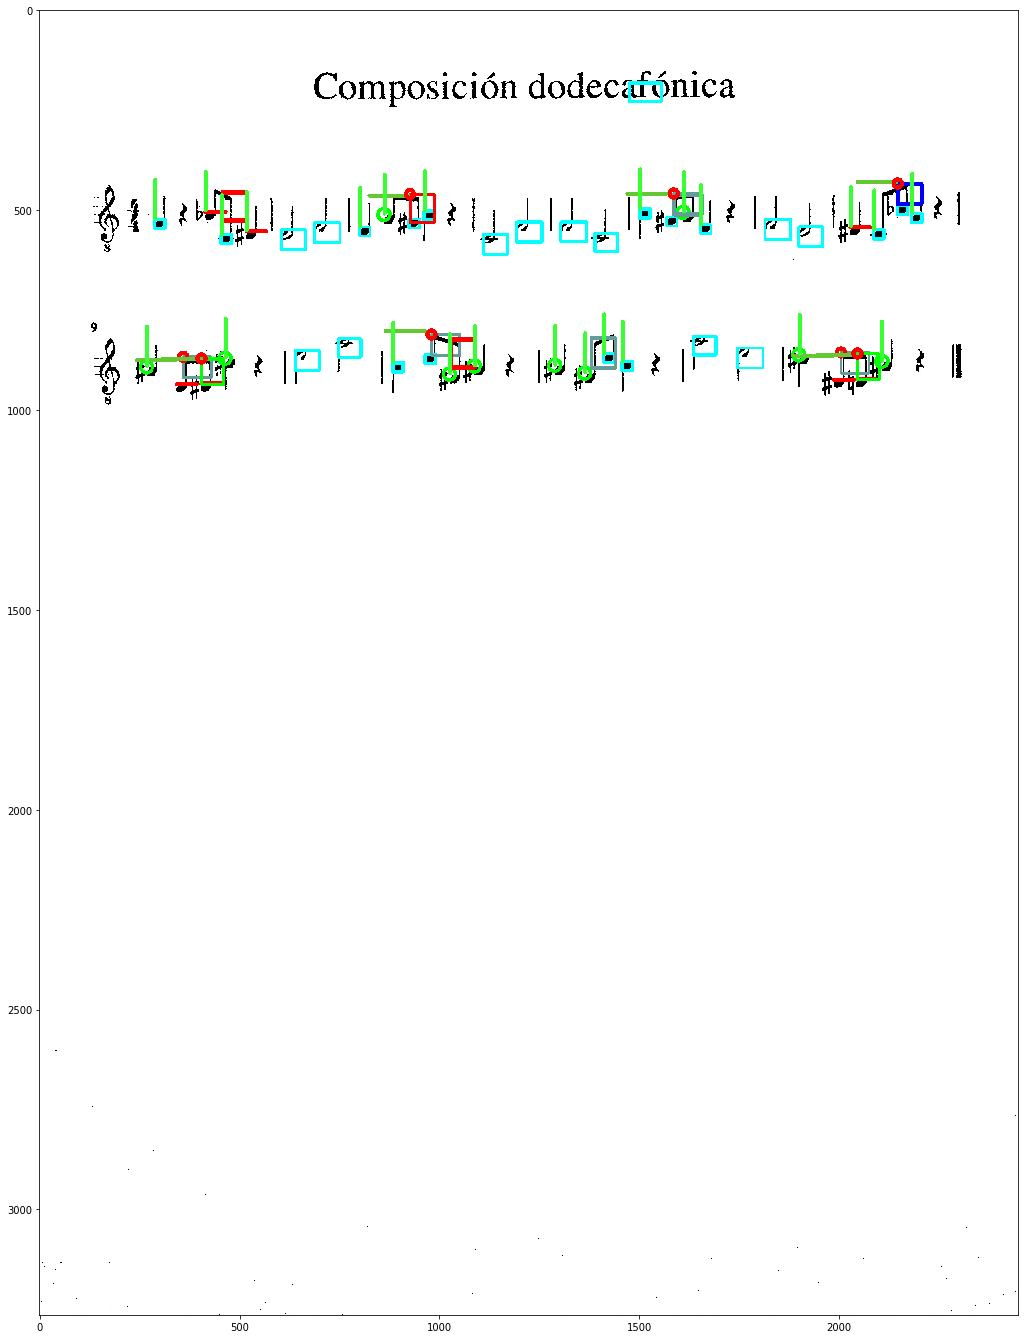

In [110]:
plt.imshow(img_dots_plot)

In [112]:
print len(single_templates_dict['half_heads'])

12
